File:    R01_6_2_PrincipalComponents.R
Course:  R01: R: An introduction
Chapter: 6: Modeling data
Section: 2: Principal components
Author:  Barton Poulson, datalab.cc, @bartonpoulson
Date:    2016-08-04

INSTALL AND LOAD PACKAGES ################################

In [1]:
# Packages I load every time; uses "pacman"
pacman::p_load(pacman, dplyr, GGally, ggplot2, ggthemes, 
  ggvis, httr, lubridate, plotly, rio, rmarkdown, shiny, 
  stringr, tidyr) 

ERROR: Error in loadNamespace(x): there is no package called ‘pacman’


In [2]:
library(datasets)  # Load base packages manually

LOAD DATA ################################################

In [3]:
head(mtcars)
cars <- mtcars[, c(1:4, 6:7, 9:11)]  # Select variables
head(cars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


,mpg,cyl,disp,hp,wt,qsec,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,2.620,16.46,1,4,4
Mazda RX4 Wag,21.0,6,160,110,2.875,17.02,1,4,4
Datsun 710,22.8,4,108,93,2.320,18.61,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.215,19.44,0,3,1
Hornet Sportabout,18.7,8,360,175,3.440,17.02,0,3,2
Valiant,18.1,6,225,105,3.460,20.22,0,3,1


COMPUTE PCA ##############################################

In [4]:
# For entire data frame ####################################
pc <- prcomp(cars,
        center = TRUE,  # Centers means to 0 (optional)
        scale = TRUE)   # Sets unit variance (helpful)

To specify variables #####################################

In [5]:
pc <- prcomp(~ mpg + cyl + disp + hp + wt + qsec + am +
        gear + carb, 
        data = mtcars, 
        center = TRUE,
        scale = TRUE)

EXAMINE RESULTS ##########################################

In [6]:
# Get summary stats
summary(pc)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.3391 1.5299 0.71836 0.46491 0.38903 0.35099 0.31714
Proportion of Variance 0.6079 0.2601 0.05734 0.02402 0.01682 0.01369 0.01118
Cumulative Proportion  0.6079 0.8680 0.92537 0.94939 0.96620 0.97989 0.99107
                           PC8    PC9
Standard deviation     0.24070 0.1499
Proportion of Variance 0.00644 0.0025
Cumulative Proportion  0.99750 1.0000

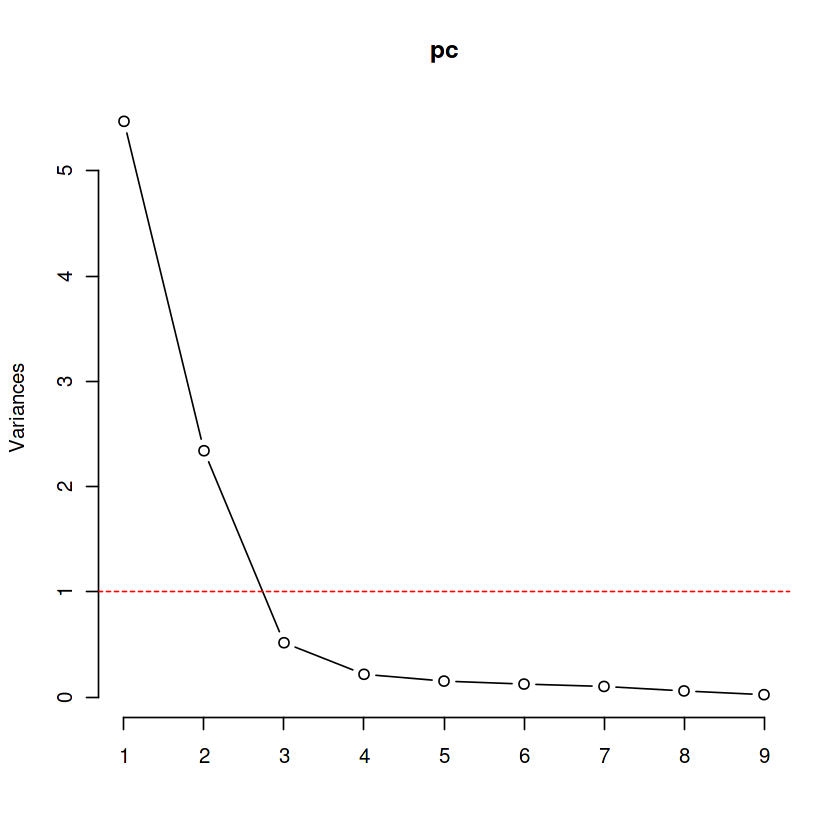

In [15]:
# Screeplot for number of components
plot(pc, type='l')
abline(h=1,col='red',lty=2)

In [8]:
# Get standard deviations and rotation
pc

Standard deviations (1, .., p=9):
[1] 2.3391410 1.5299383 0.7183646 0.4649052 0.3890348 0.3509911 0.3171373
[8] 0.2406989 0.1498962

Rotation (n x k) = (9 x 9):
            PC1         PC2         PC3        PC4         PC5          PC6
mpg  -0.4023287  0.02205294 -0.17272803 -0.1366169  0.31654561 -0.718609897
cyl   0.4068870  0.03589482 -0.27747610  0.1410976  0.02066646 -0.214224005
disp  0.4046964 -0.06479590 -0.17669890 -0.5089434  0.21525777  0.010052074
hp    0.3699702  0.26518848 -0.01046827 -0.1273173  0.42166543 -0.254229405
wt    0.3850686 -0.15955242  0.33740464 -0.4469327 -0.21141143  0.002897706
qsec -0.2168575 -0.48343885  0.54815205 -0.2545226  0.05466817 -0.226660704
am   -0.2594512  0.46039449 -0.19492256 -0.5354196 -0.55331460 -0.087616182
gear -0.2195660  0.50608232  0.34579810 -0.1799814  0.50533262  0.393990378
carb  0.2471604  0.44322600  0.53847588  0.3203064 -0.25696817 -0.398353829
            PC7        PC8         PC9
mpg   0.3633216 -0.1487806  0.13567069
c

In [ ]:
# See how cases load on PCs
predict(pc) %>% round(2)

In [ ]:
# Biplot of first two components
biplot(pc)

CLEAN UP #################################################

In [ ]:
# Clear environment
rm(list = ls()) 

In [ ]:
# Clear packages
p_unload(all)  # Remove all add-ons
detach("package:datasets", unload = TRUE)  # For base

In [ ]:
# Clear plots
dev.off()  # But only if there IS a plot

In [ ]:
# Clear console
cat("\014")  # ctrl+L

Clear mind :)